# Dependencies and files

## Imports

In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
import gseapy
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Global variables

## Load files

### Load pseudobulks

In [ ]:
adata_pb = sc.read_h5ad('data/pseudobulks/velmeshev.h5ad')
adata_pb.layers['counts'] = adata_pb.X.copy()
adata_pb

AnnData object with n_obs × n_vars = 169 × 38660
    obs: 'sample', 'cluster', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'psbulk_cells', 'psbulk_counts'
    var: 'gene_ids'
    layers: 'psbulk_props', 'counts'

# Differential expression

In [101]:
sc.pp.filter_genes(adata_pb, min_counts=1)
sc.pp.filter_genes(adata_pb, min_cells=10)

In [ ]:
adata_pb

AnnData object with n_obs × n_vars = 169 × 21507
    obs: 'sample', 'cluster', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'psbulk_cells', 'psbulk_counts'
    var: 'gene_ids', 'n_counts', 'n_cells'
    layers: 'psbulk_props', 'counts'

## Process

In [103]:
sc.pp.normalize_total(adata_pb, target_sum=1e4)
sc.pp.log1p(adata_pb)

In [104]:
sc.pp.highly_variable_genes(adata_pb)

## Visualize

In [105]:
sc.tl.pca(adata_pb)

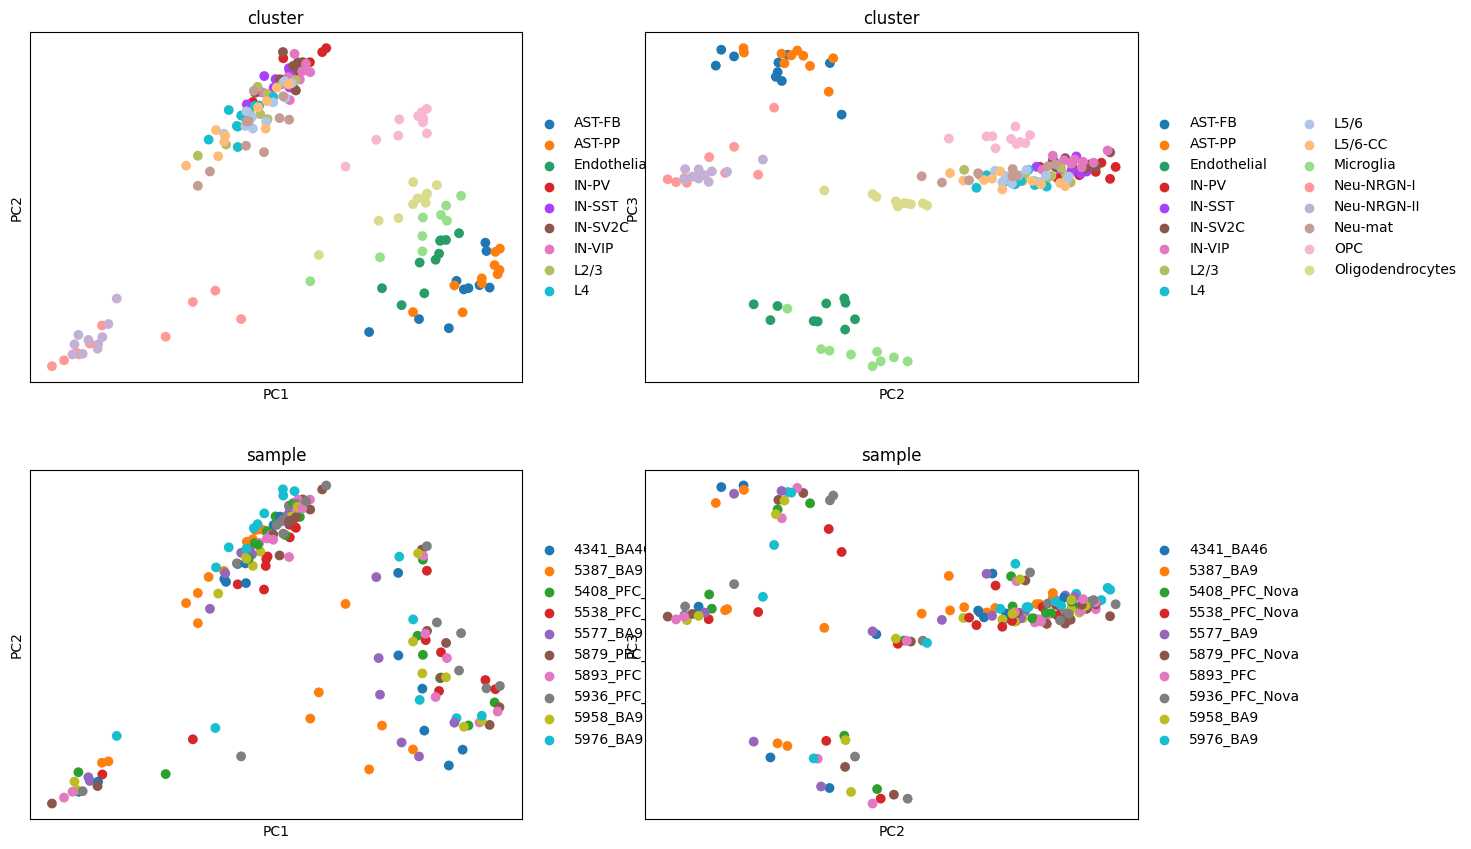

In [106]:
sc.pl.pca(adata_pb, color=['cluster', 'sample'], size=200, components=['1,2', '2,3'], ncols=2)

# Rank genes

## T-test

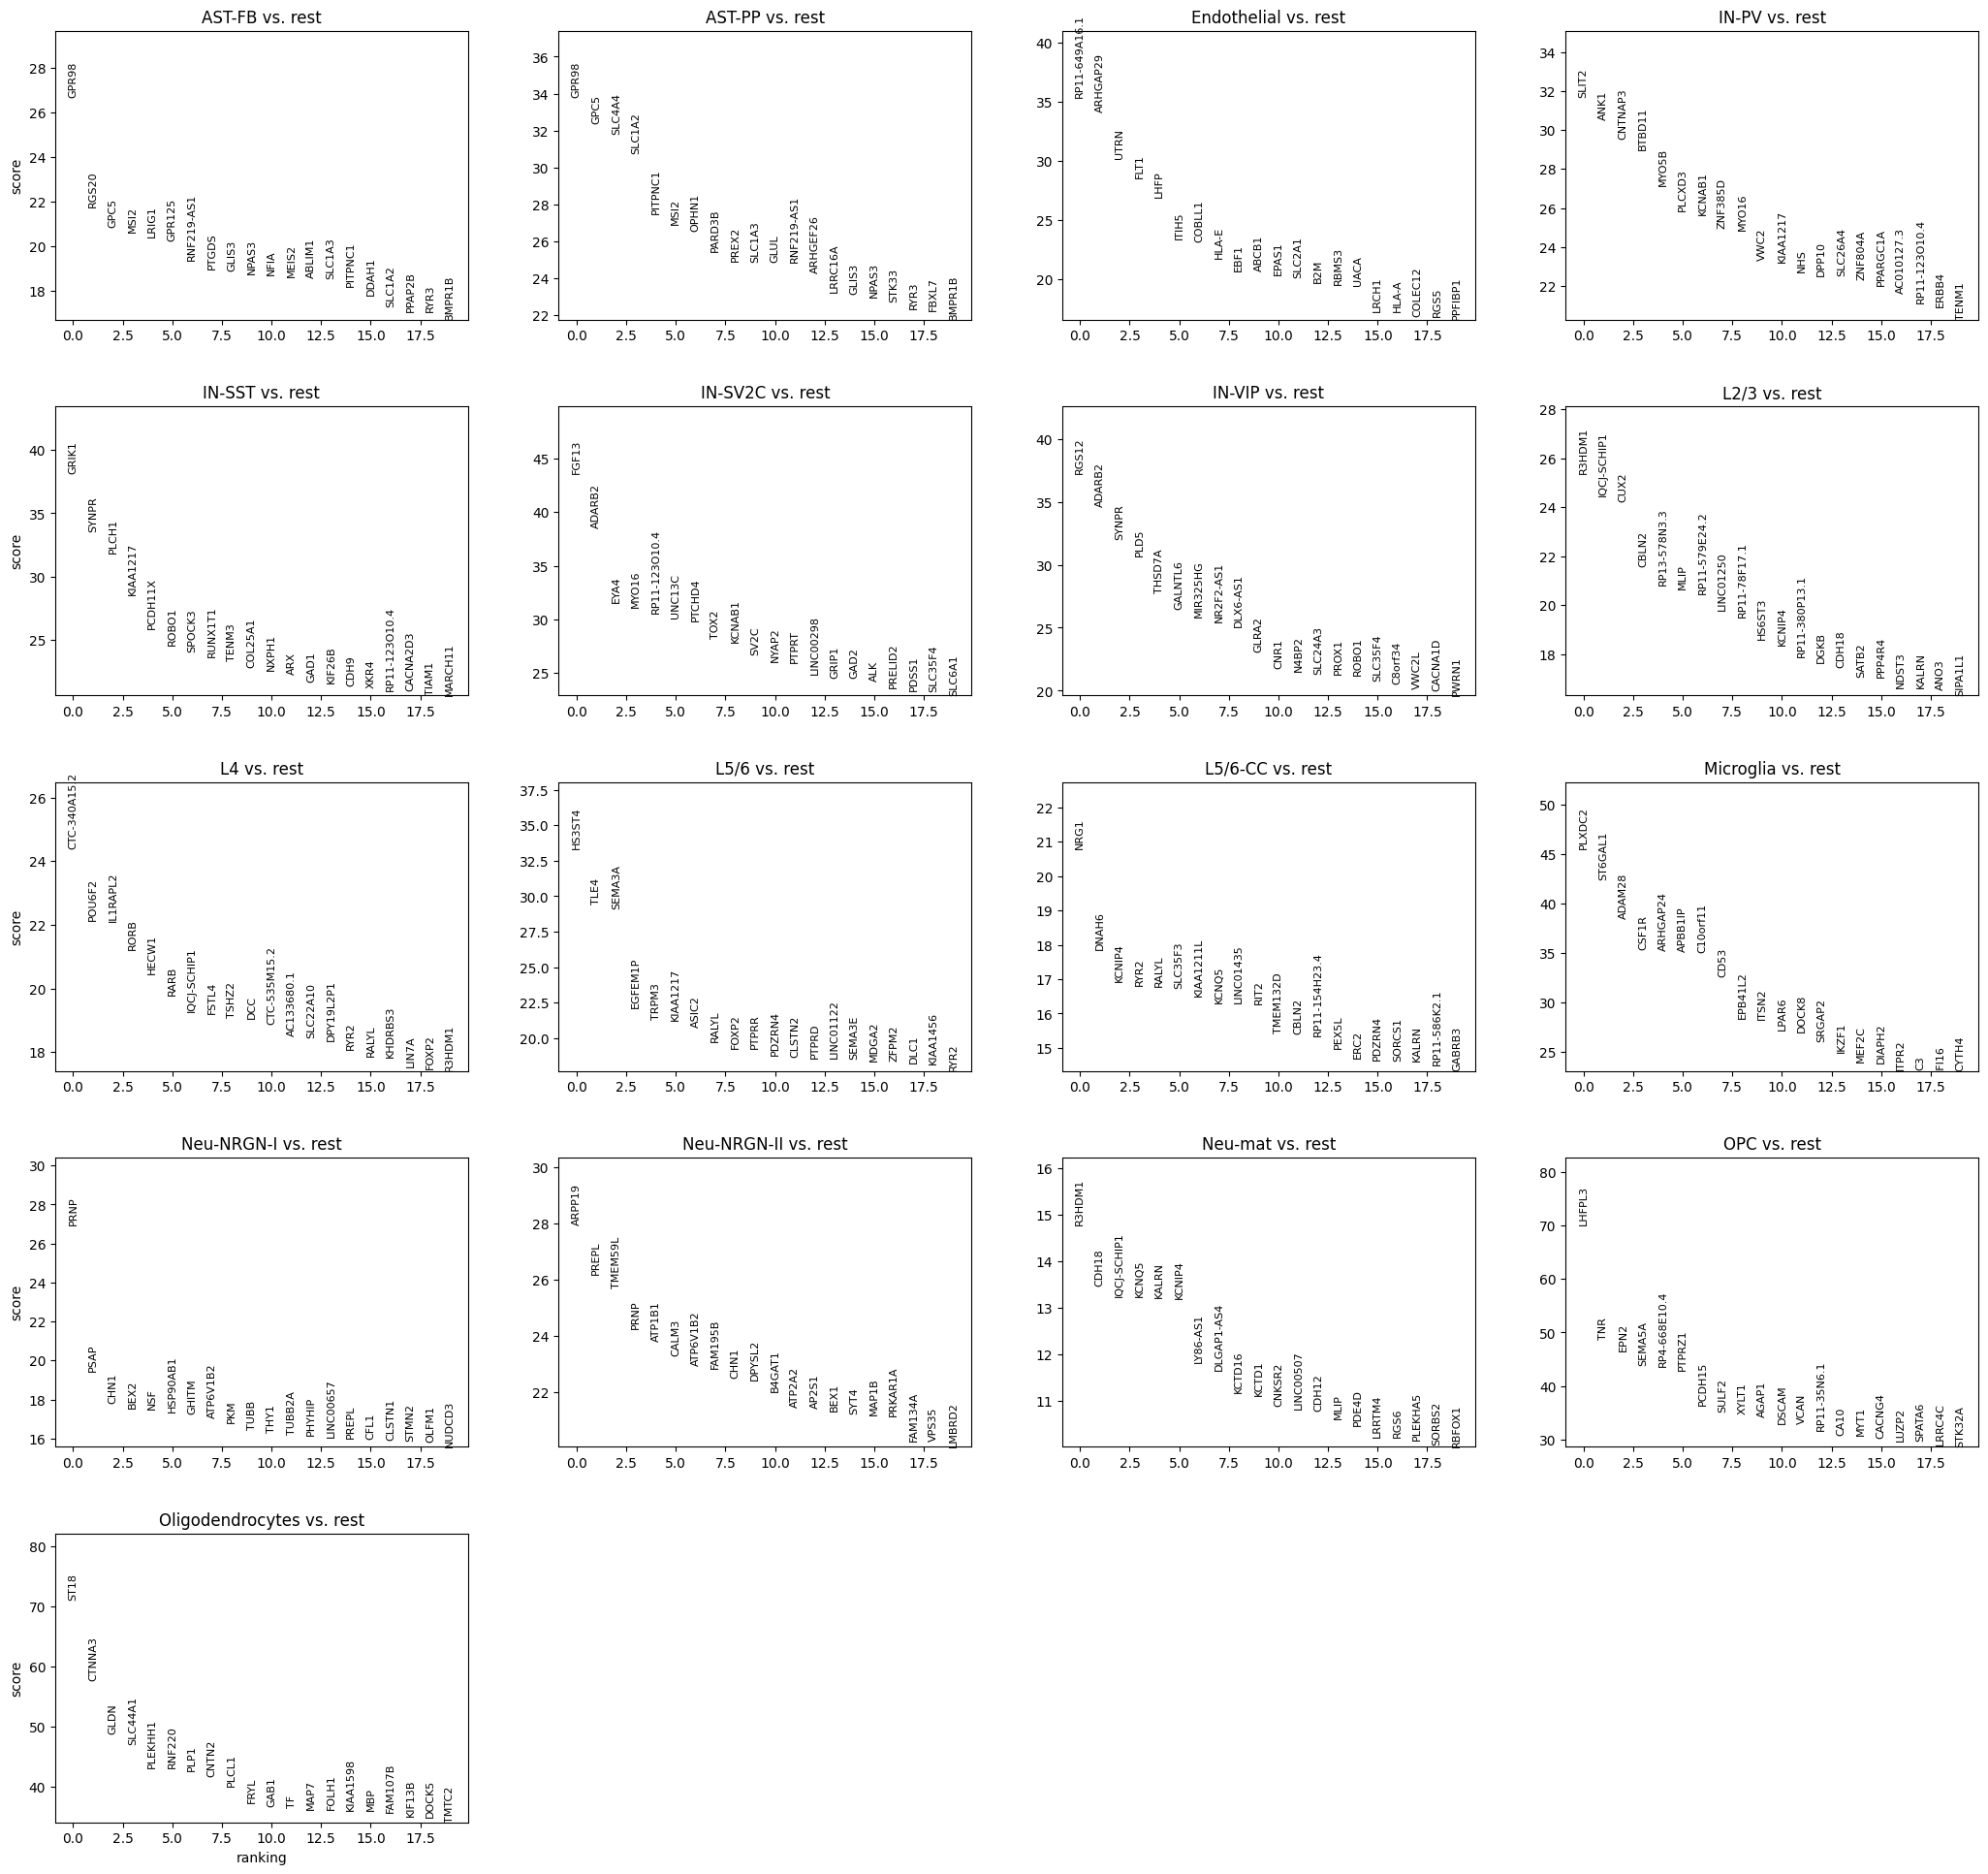

In [109]:
sc.tl.rank_genes_groups(adata_pb, 'cluster', method='t-test', reference='rest', key_added="t-test", pts=True)
sc.pl.rank_genes_groups(adata_pb, n_genes=20, sharey=False, key="t-test")

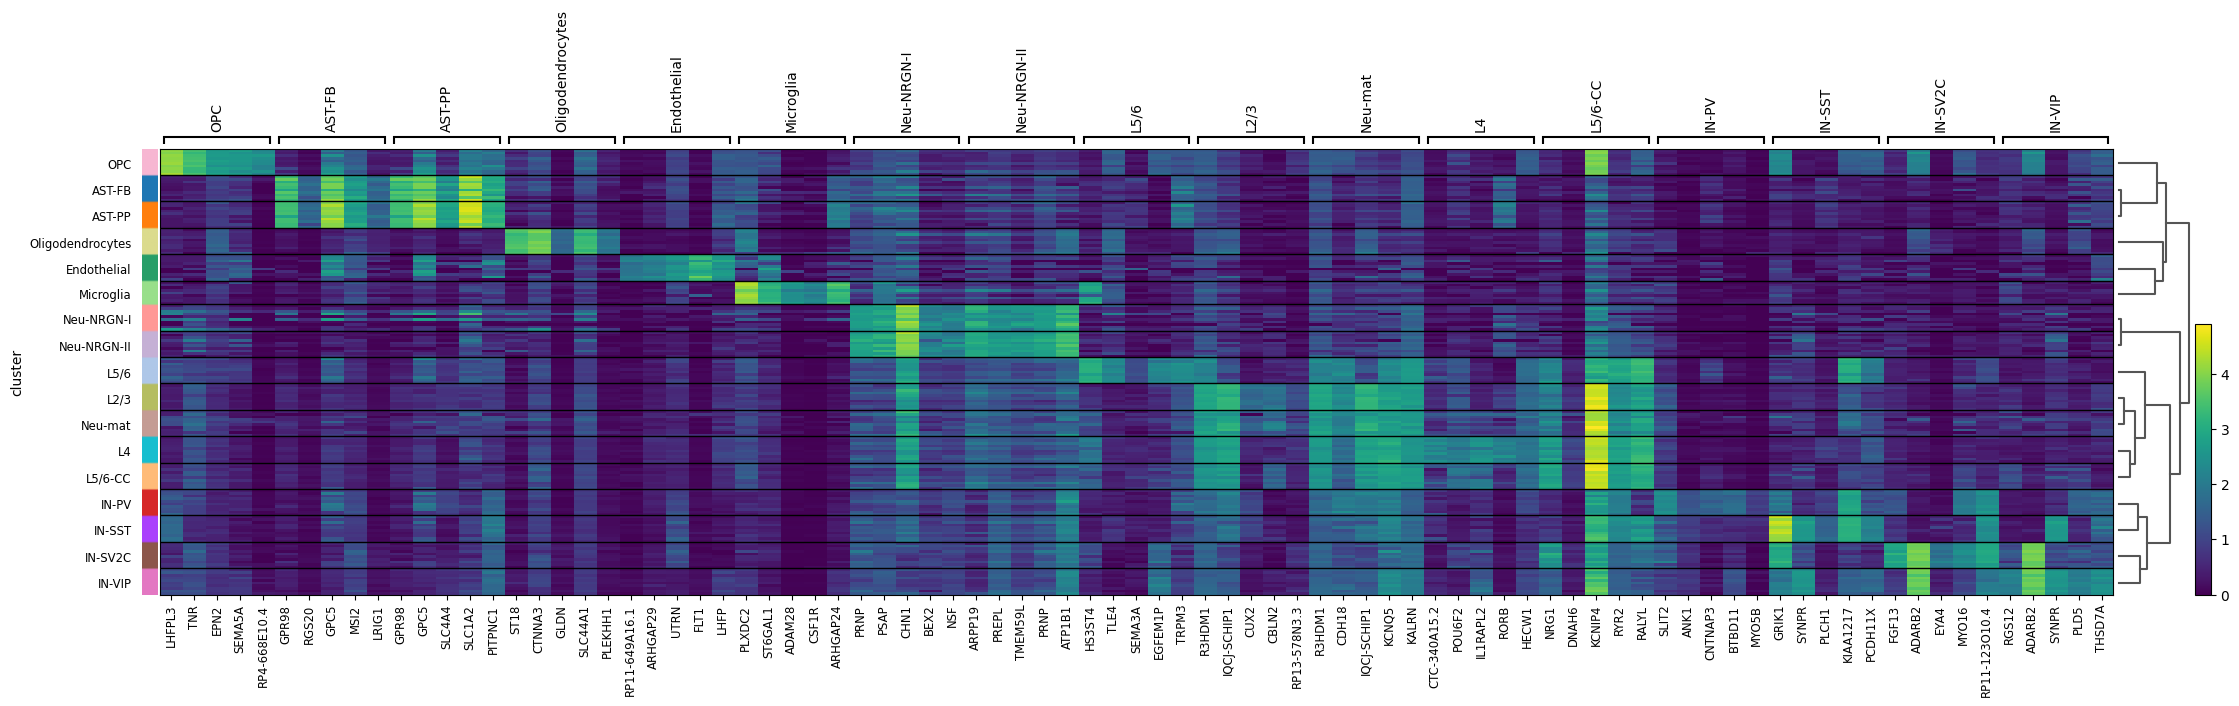

In [110]:
sc.pl.rank_genes_groups_heatmap(adata_pb, n_genes=5, key="t-test", groupby="cluster", show_gene_labels=True)

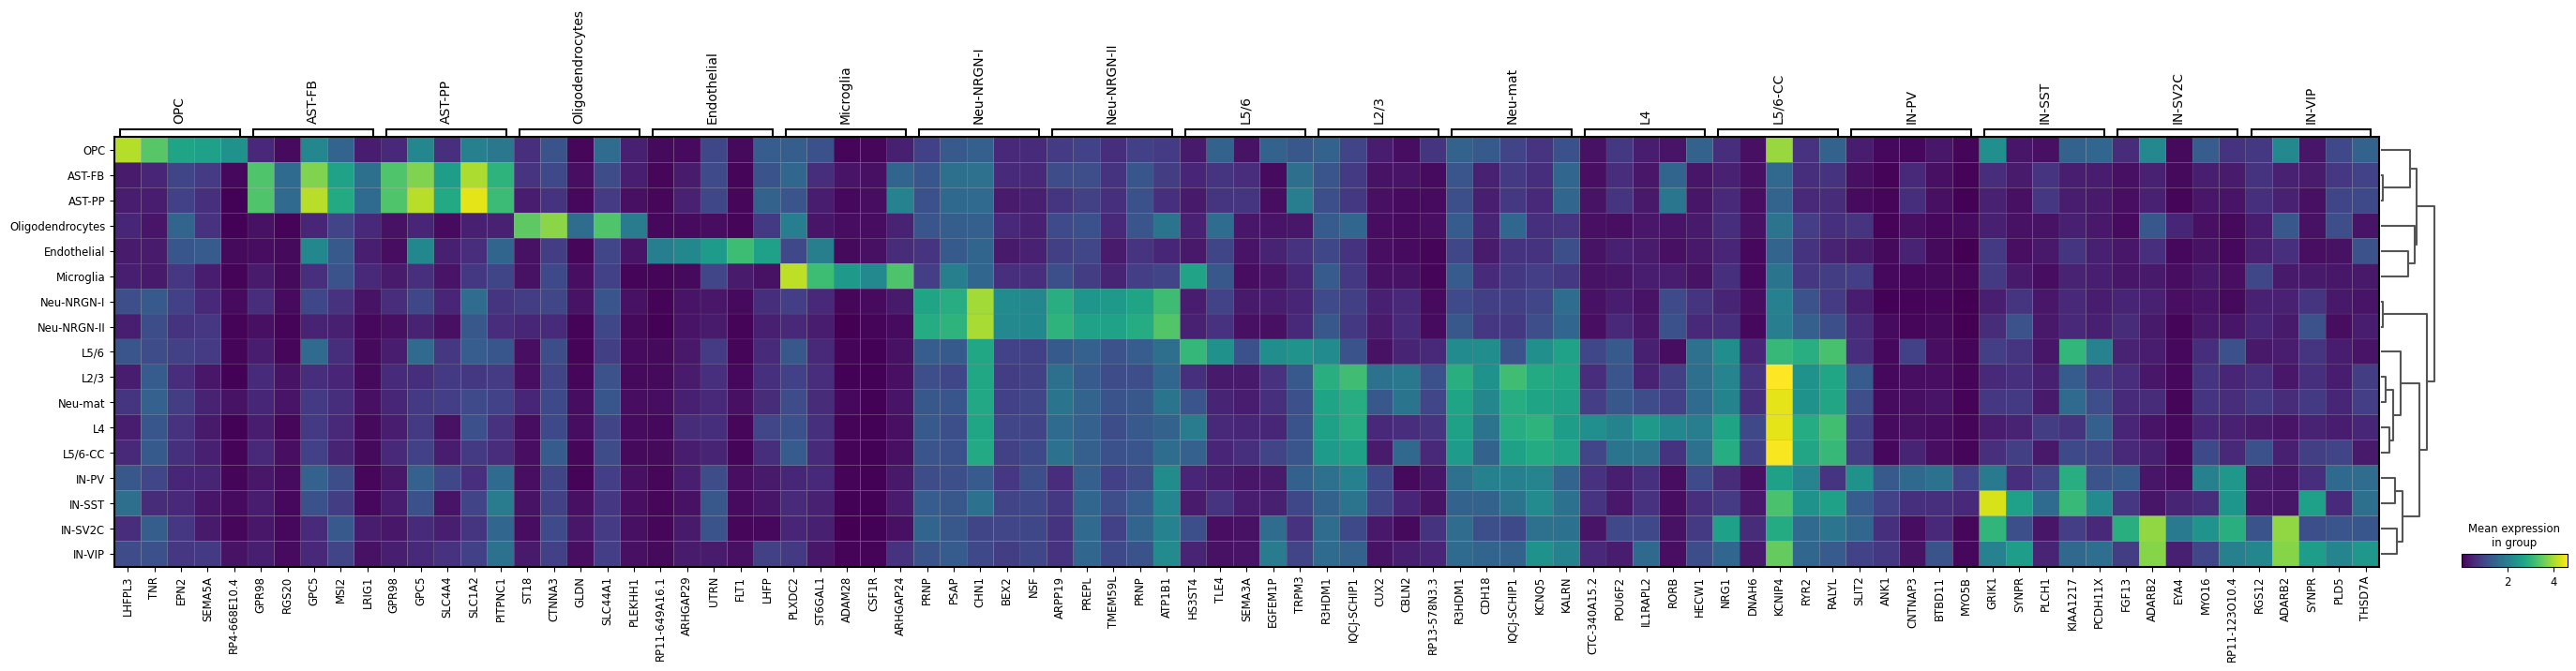

In [111]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="t-test", groupby="cluster")

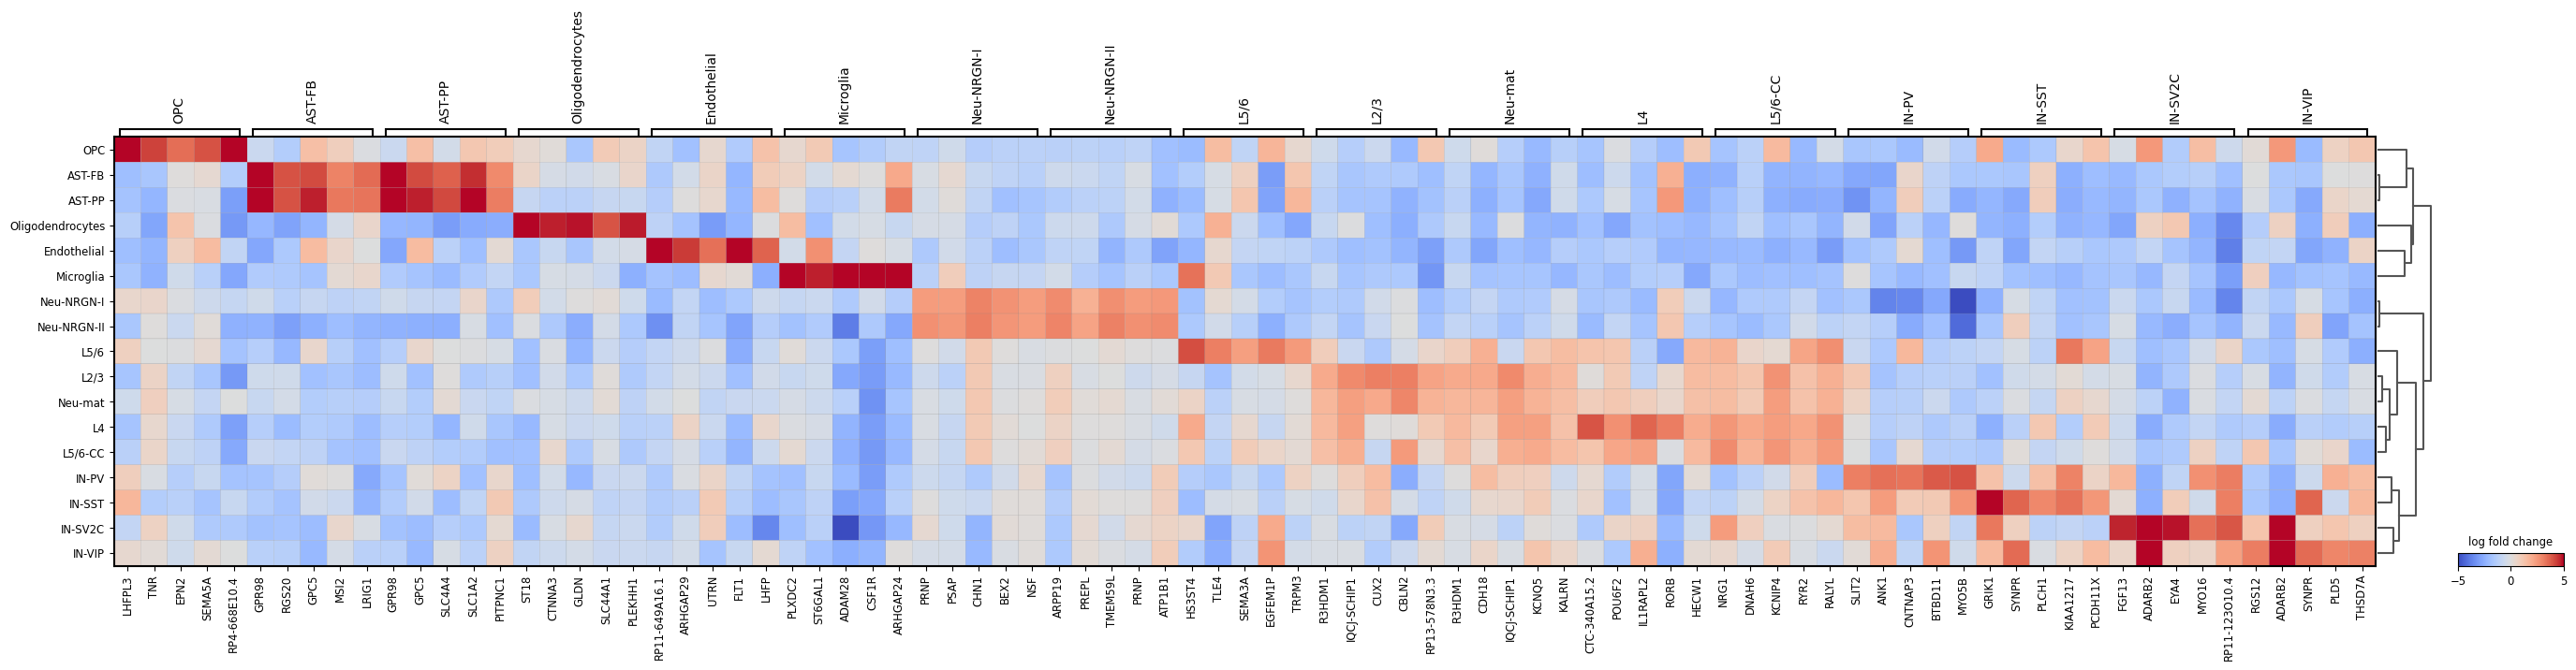

In [112]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="t-test", groupby="cluster", vcenter=0, vmax=5, vmin=-5, values_to_plot='logfoldchanges', cmap='coolwarm')

## Wilcoxon

/env/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:459: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs[-1].set_ylim(ymin, ymax)


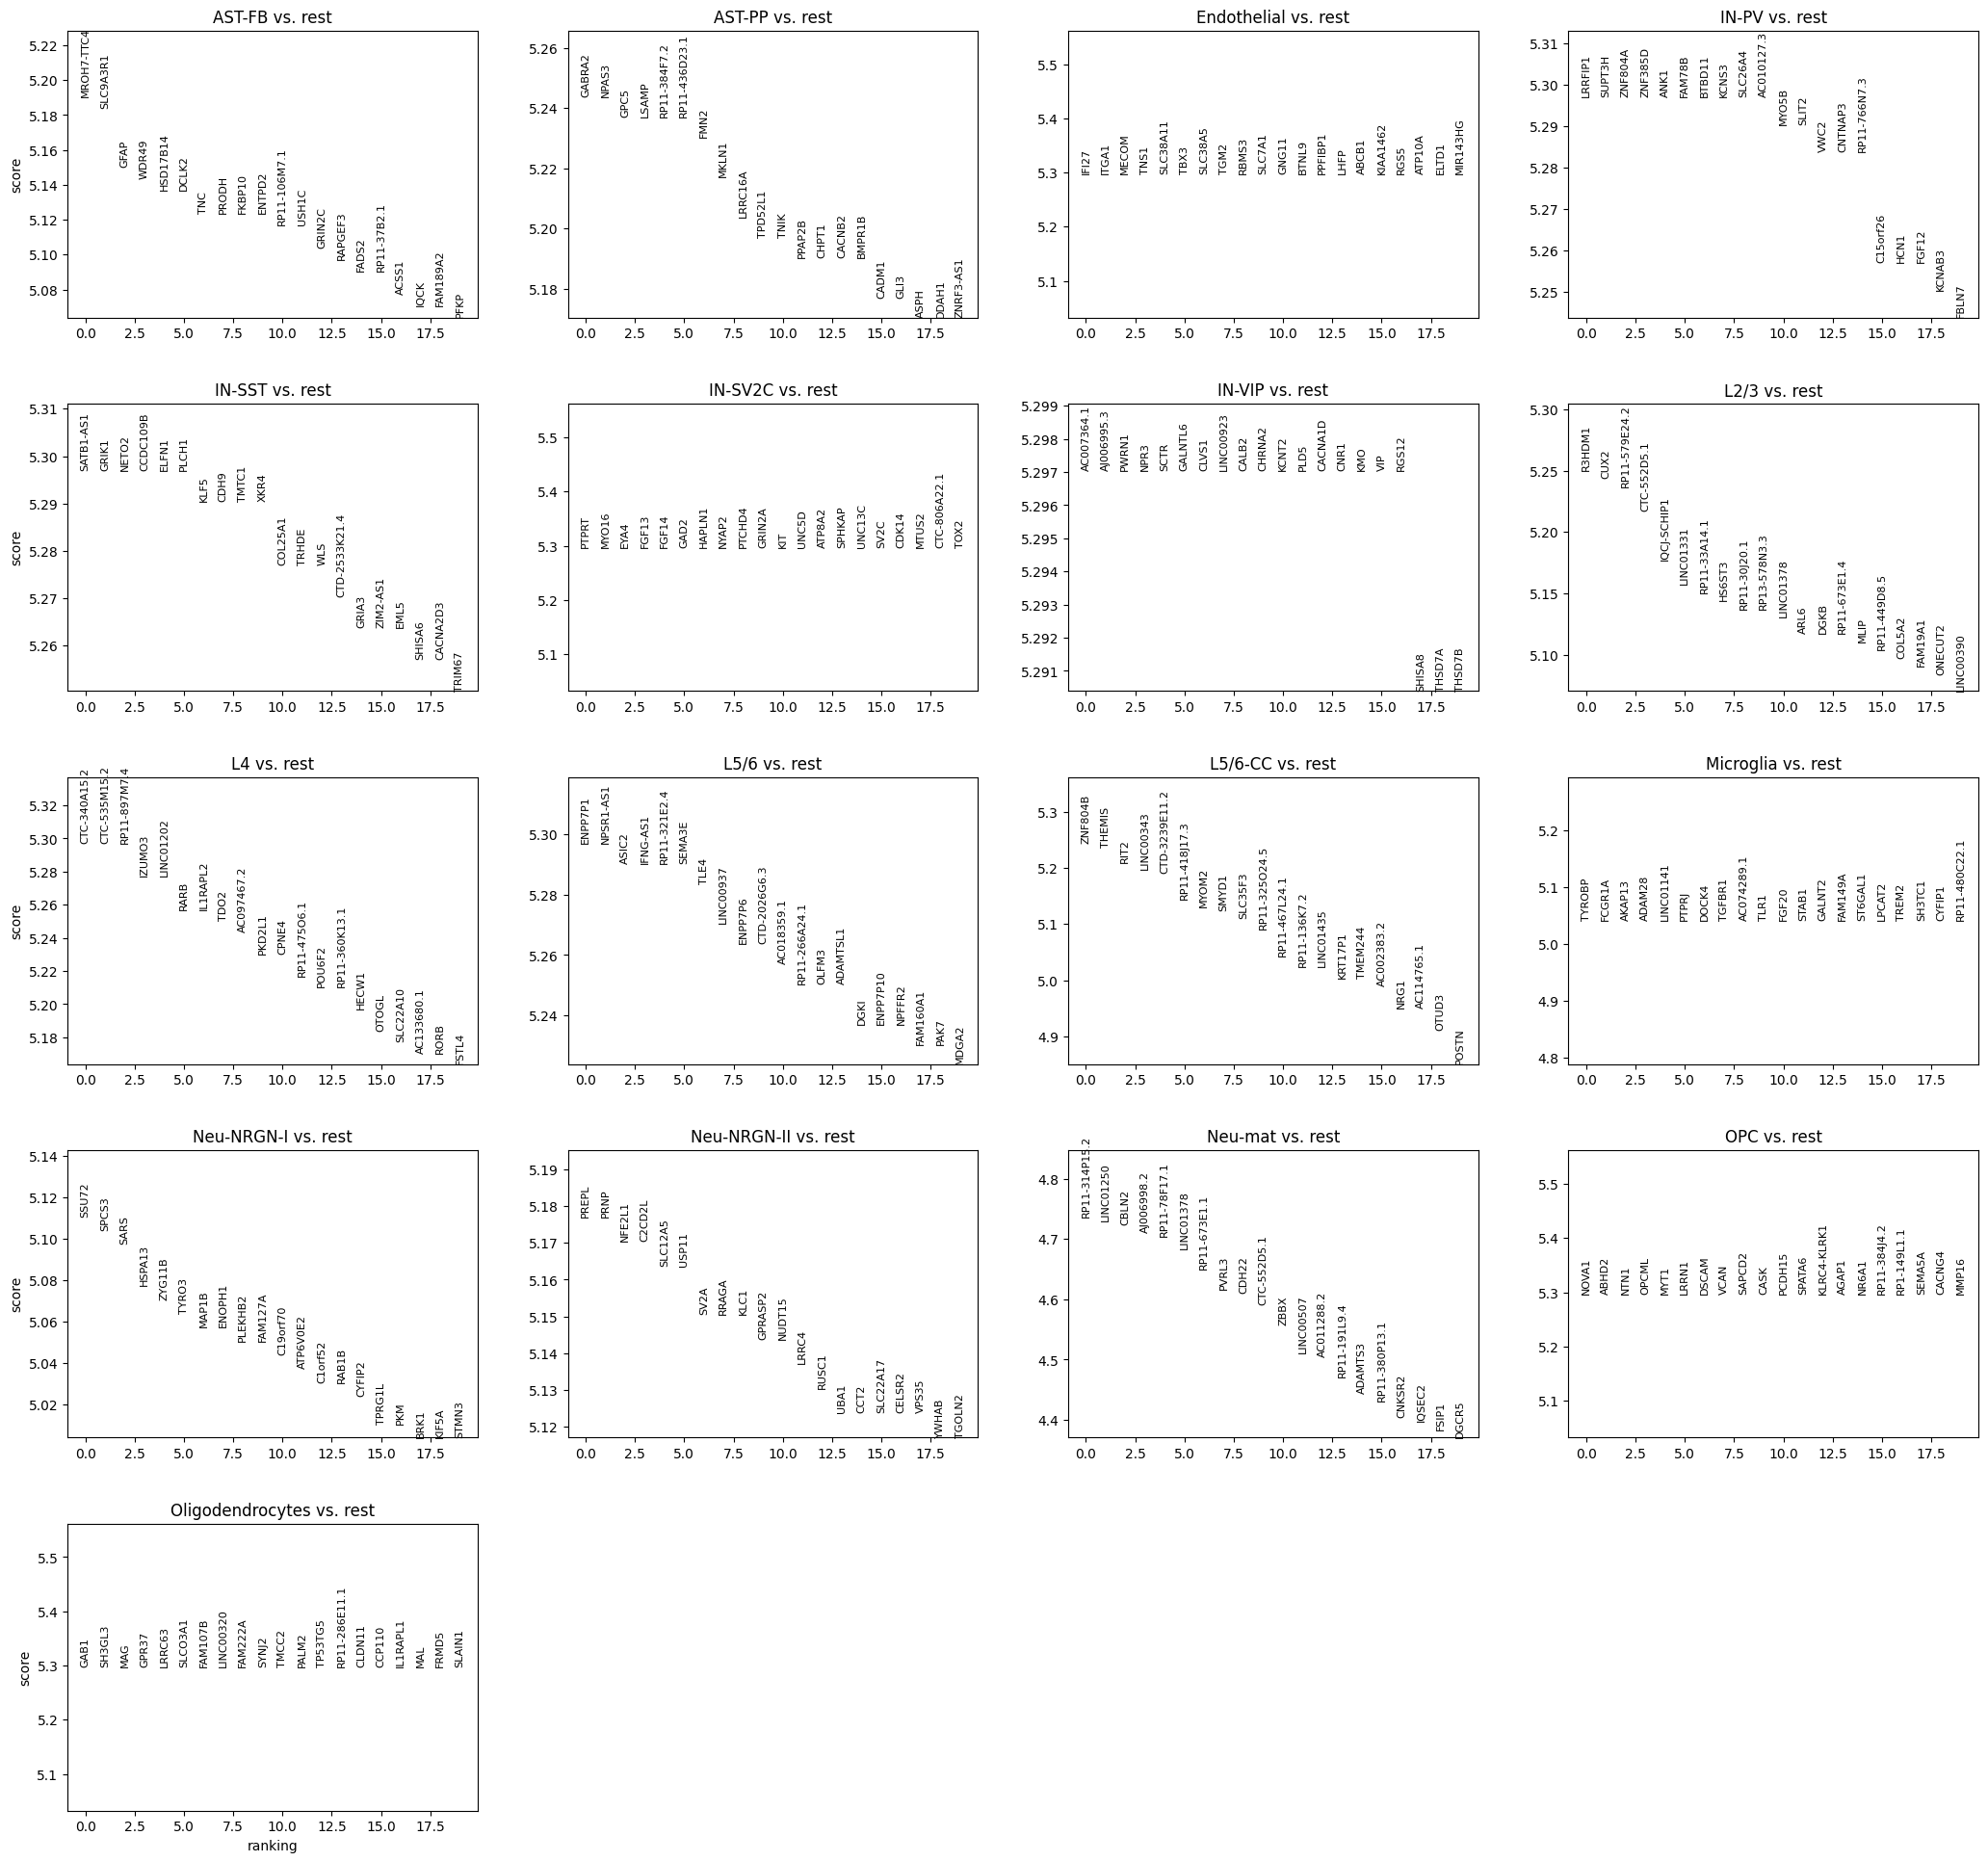

In [113]:
sc.tl.rank_genes_groups(adata_pb, 'cluster', method='wilcoxon', reference='rest', key_added="wilcoxon", pts=True)
sc.pl.rank_genes_groups(adata_pb, n_genes=20, sharey=False, key="wilcoxon")

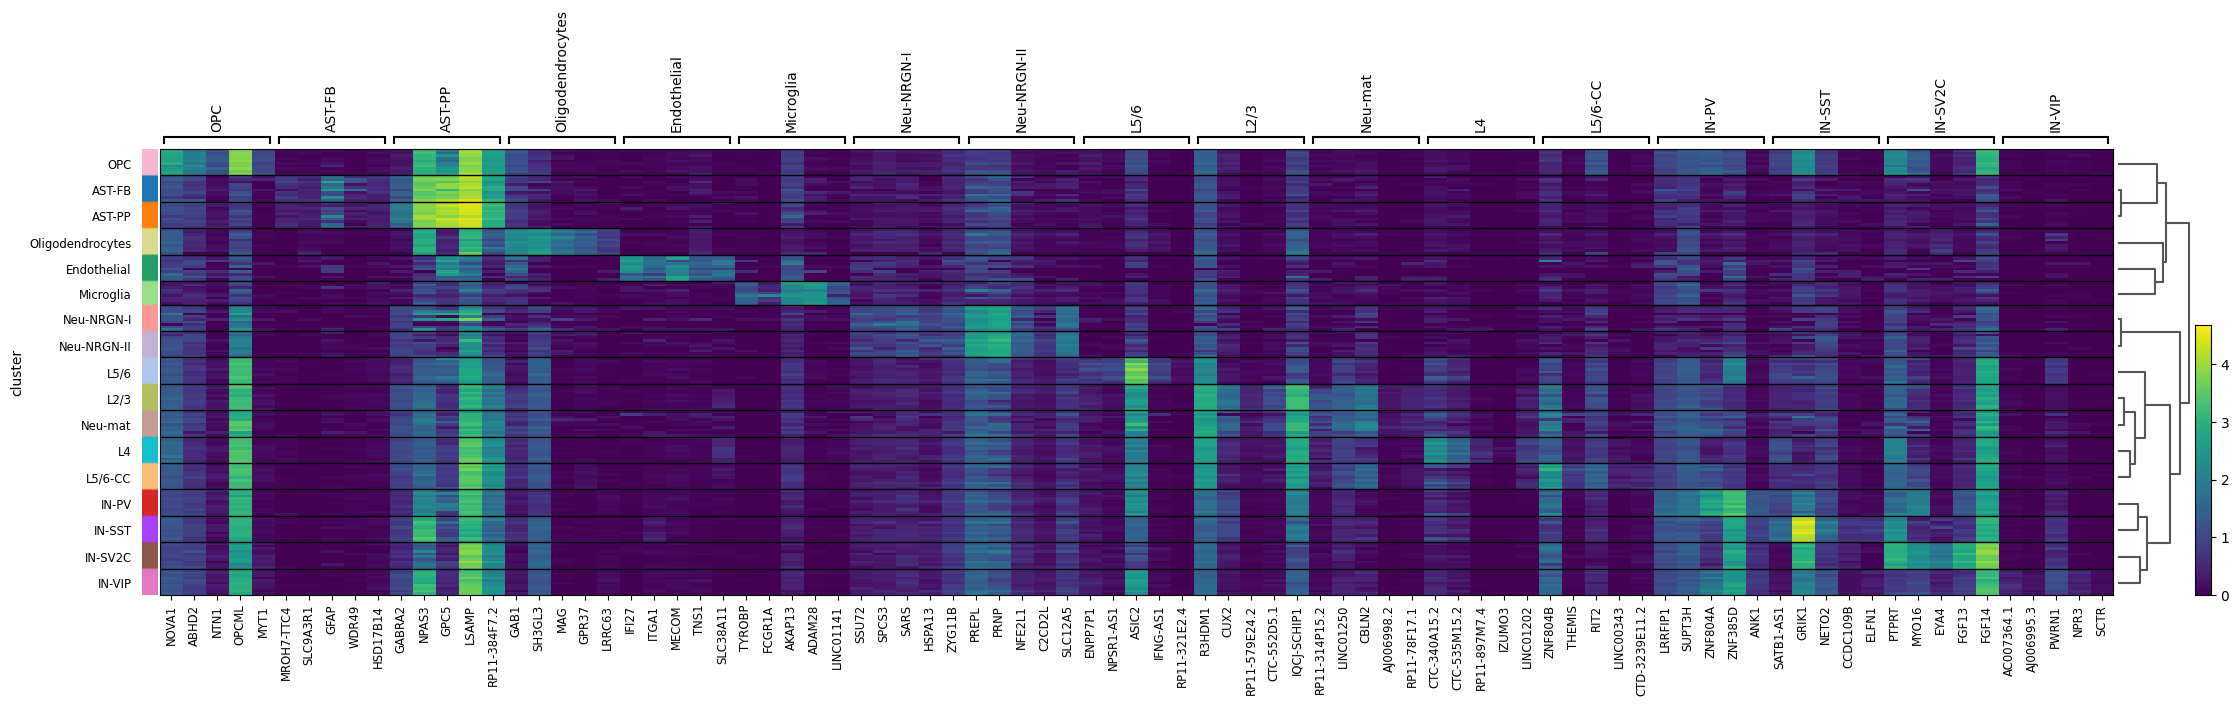

In [114]:
sc.pl.rank_genes_groups_heatmap(adata_pb, n_genes=5, key="wilcoxon", groupby="cluster", show_gene_labels=True)

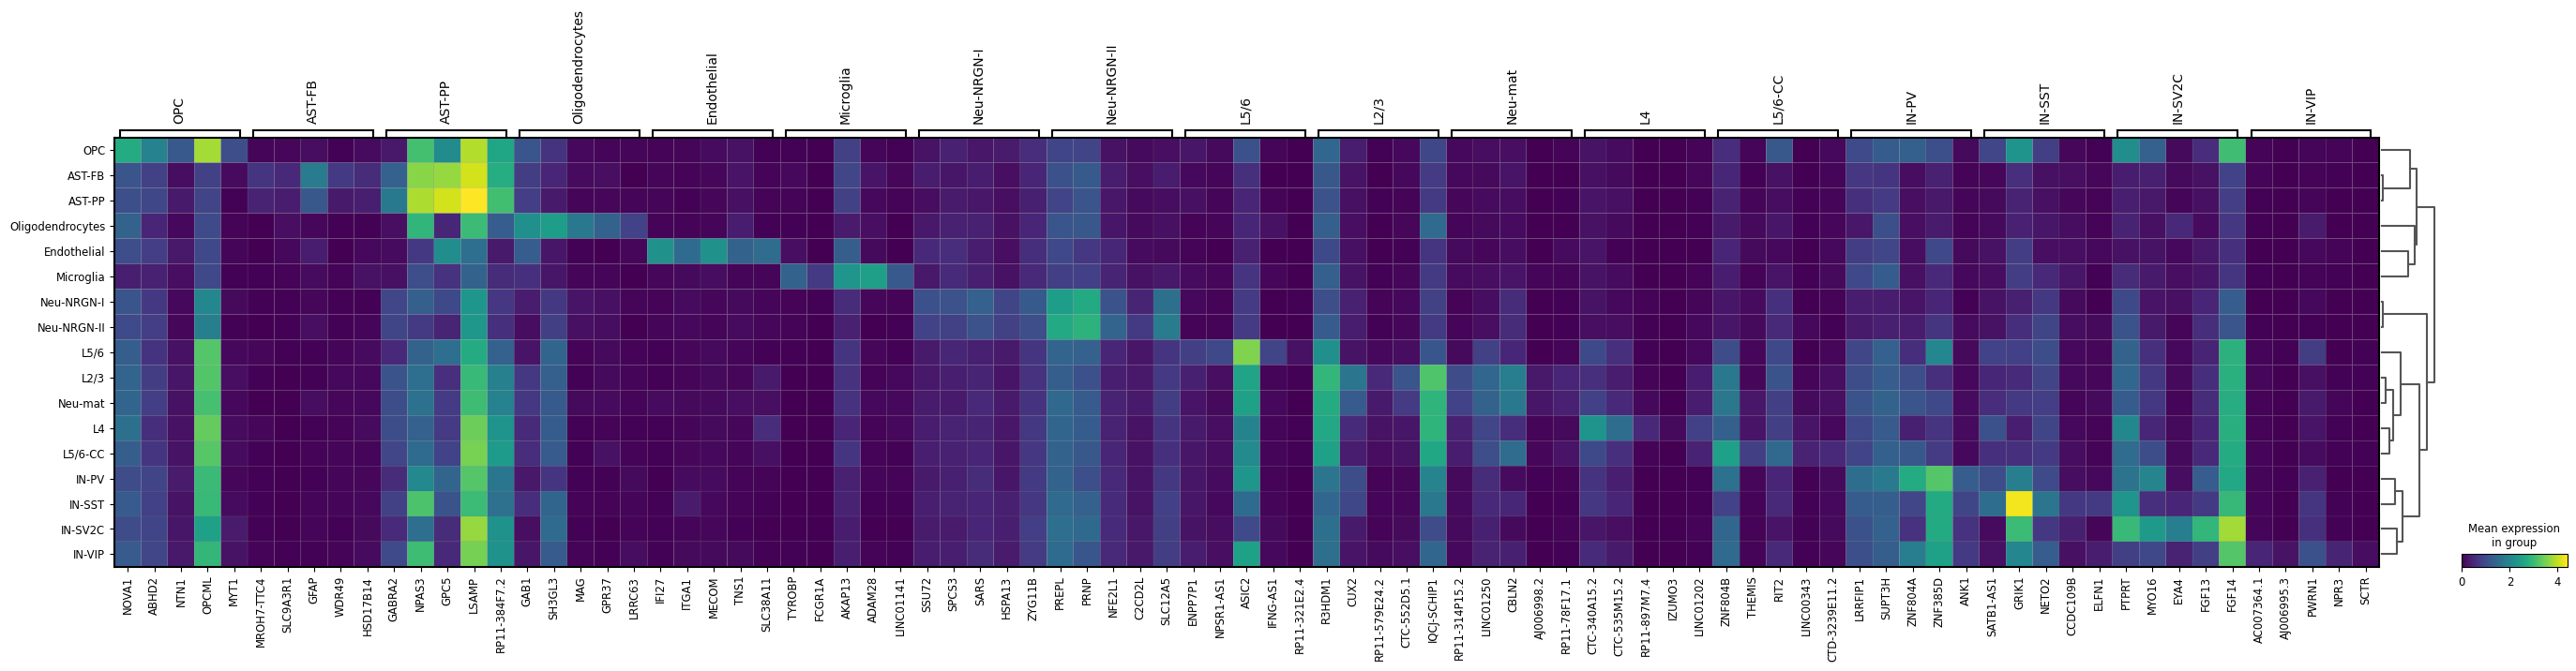

In [115]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="wilcoxon", groupby="cluster")

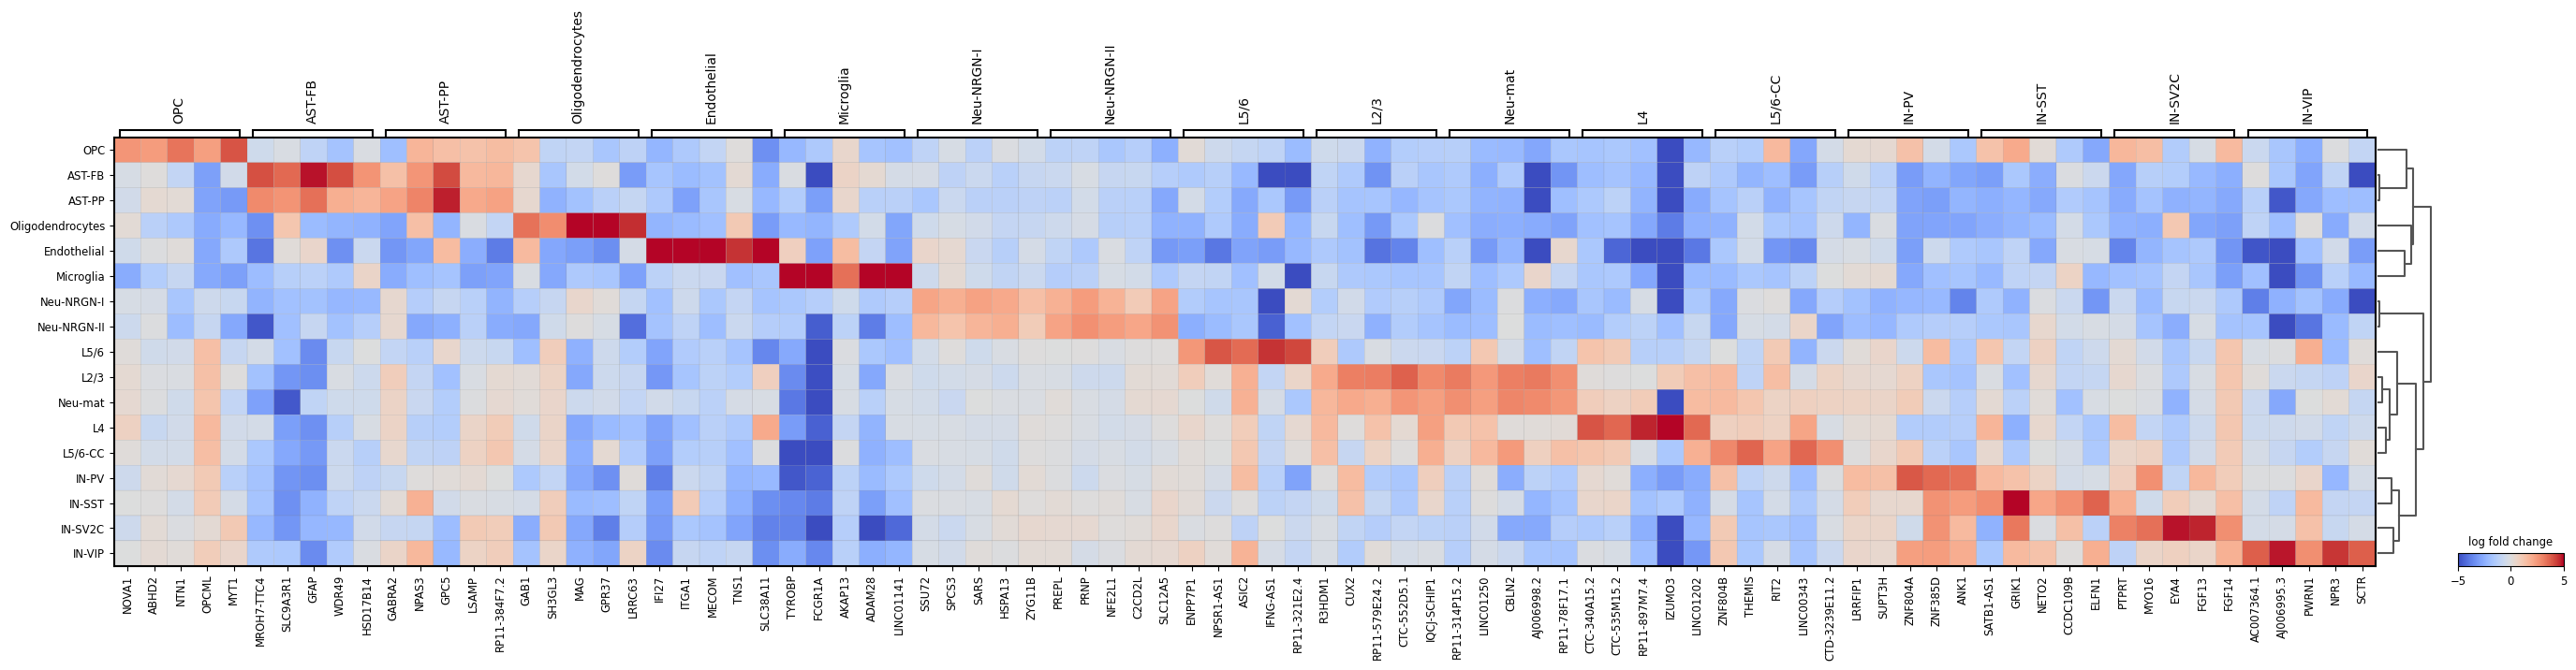

In [116]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="wilcoxon", groupby="cluster", vcenter=0, vmax=5, vmin=-5, values_to_plot='logfoldchanges', cmap='coolwarm')

## Logreg

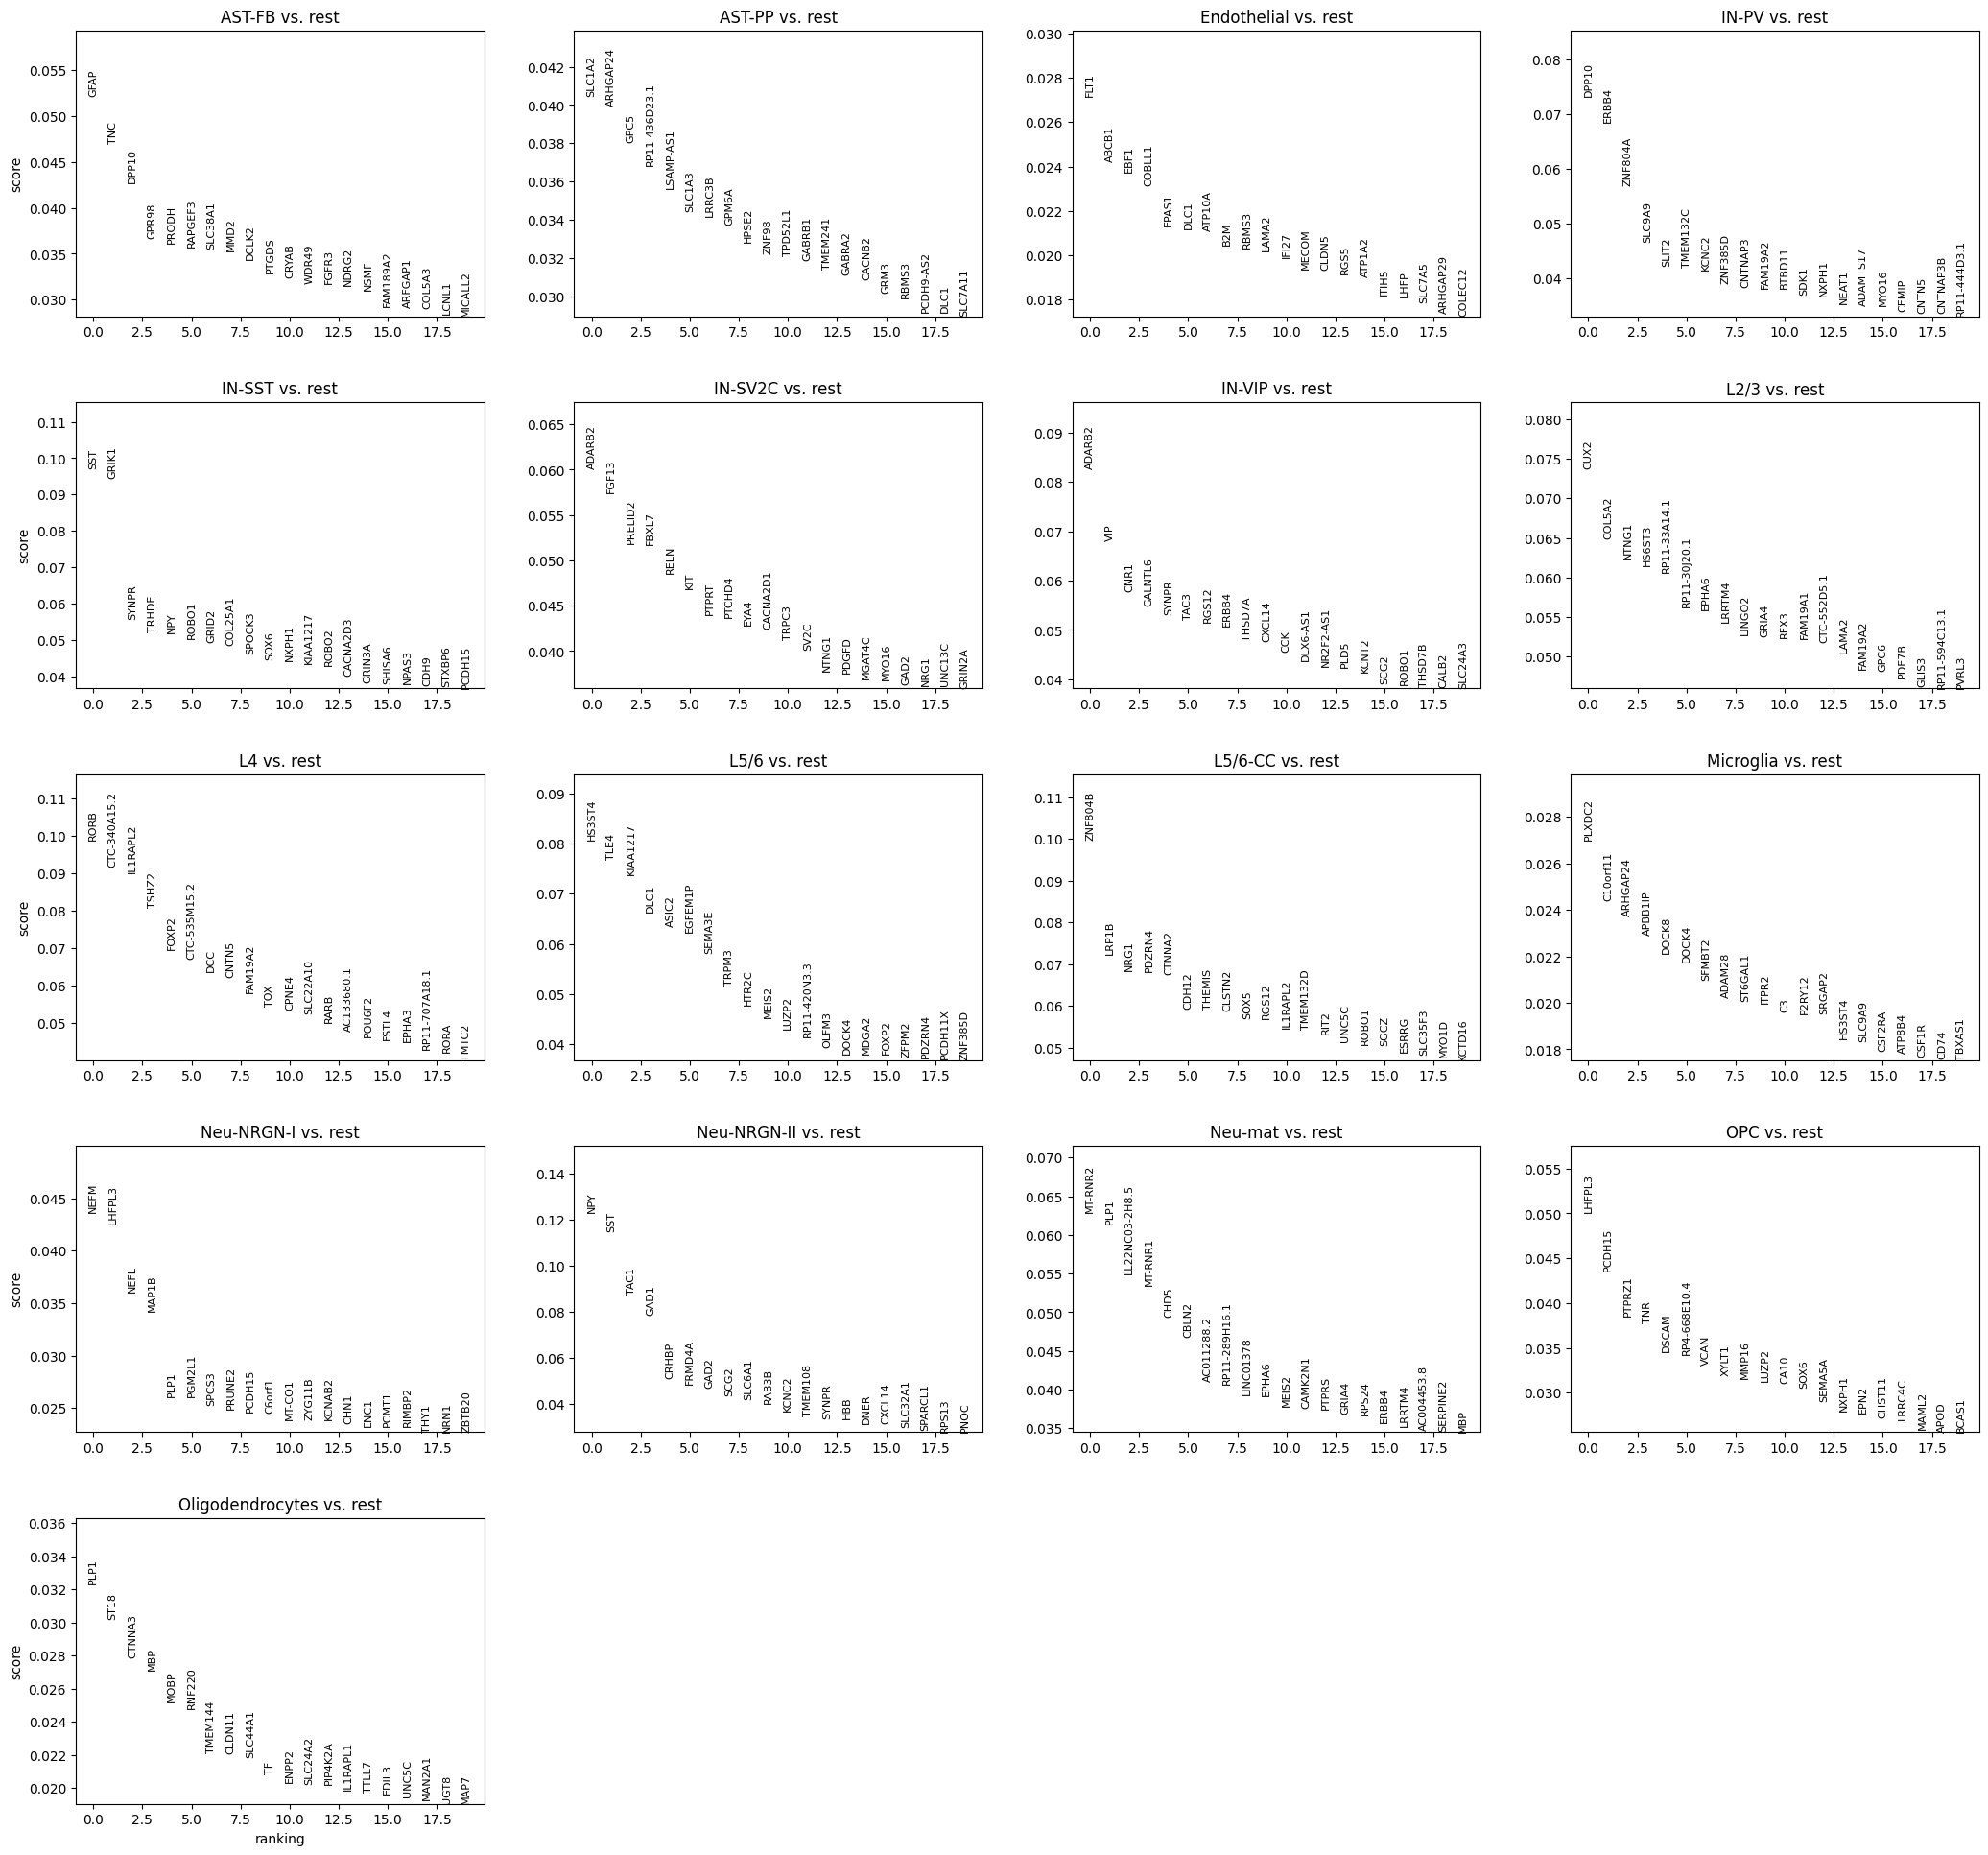

In [117]:
sc.tl.rank_genes_groups(adata_pb, 'cluster', method='logreg', reference='rest', key_added="logreg", pts=True)
sc.pl.rank_genes_groups(adata_pb, n_genes=20, sharey=False, key="logreg")

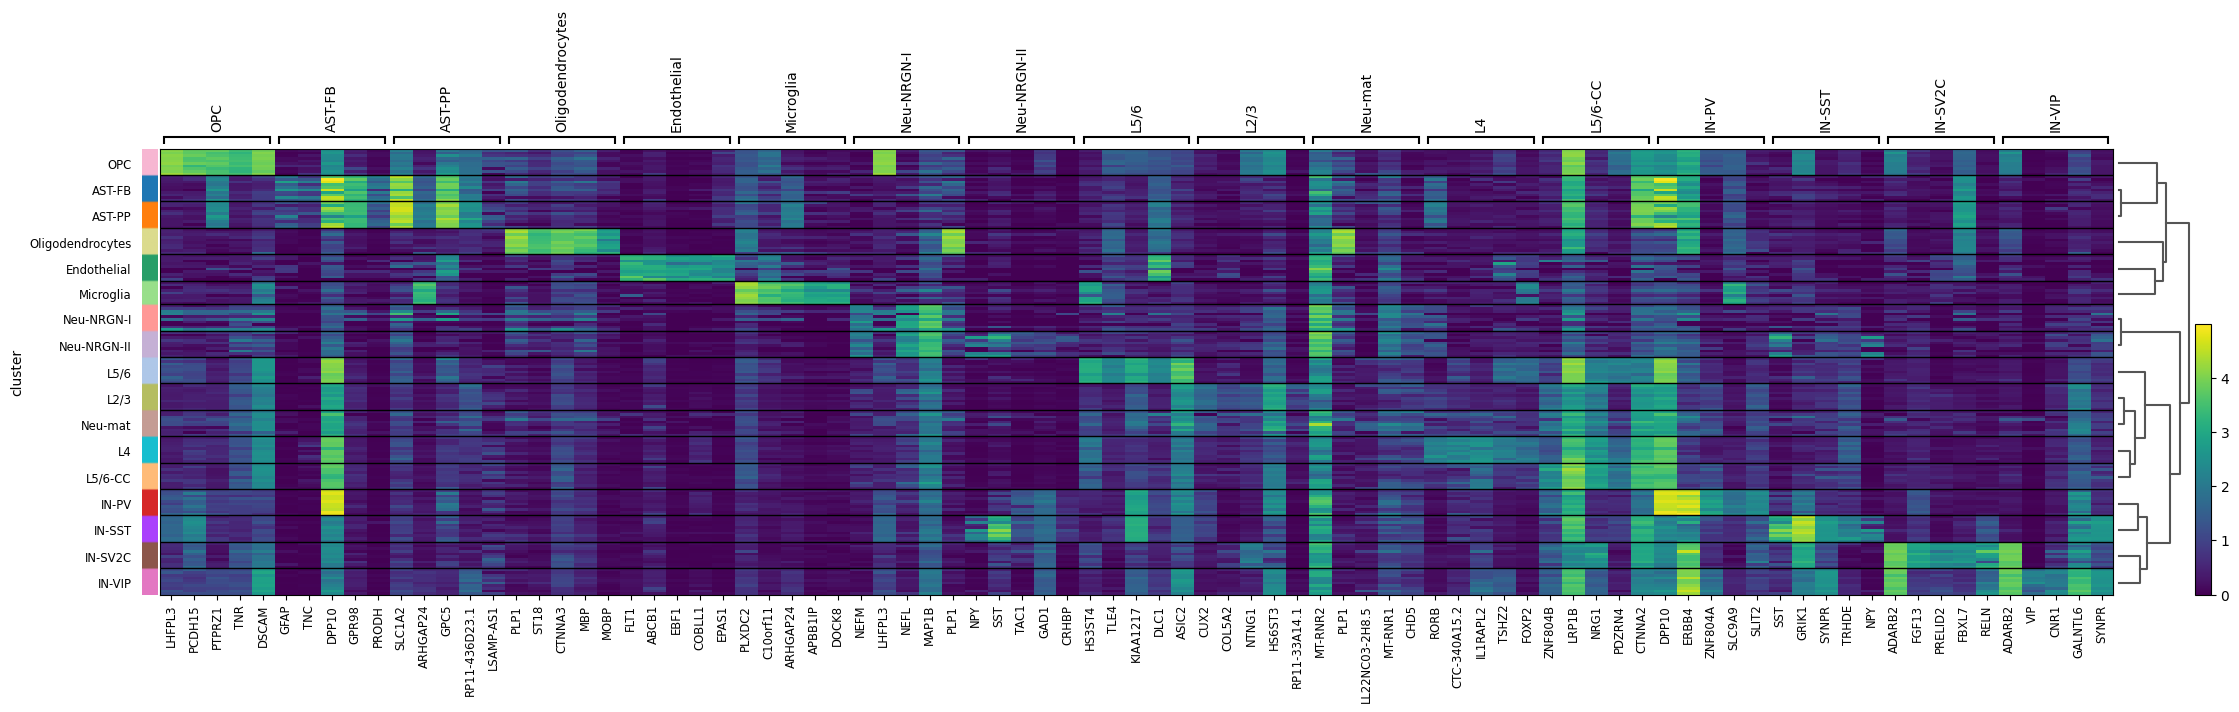

In [118]:
sc.pl.rank_genes_groups_heatmap(adata_pb, n_genes=5, key="logreg", groupby="cluster", show_gene_labels=True)

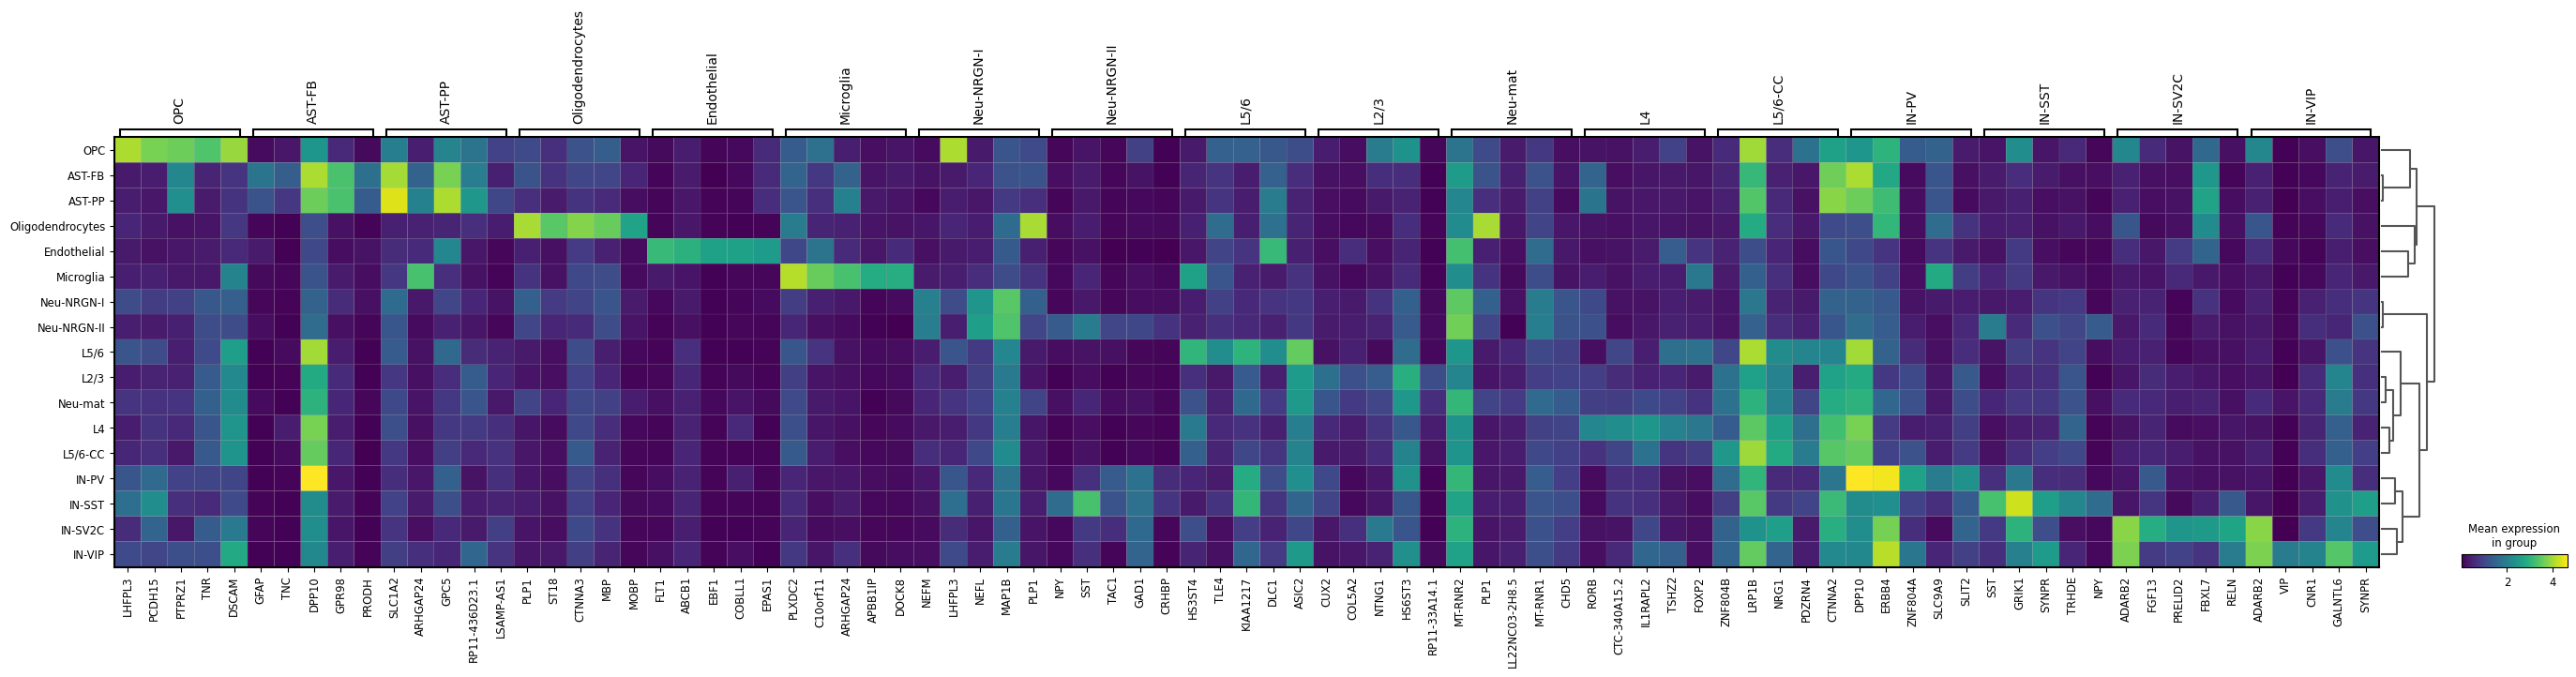

In [119]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="logreg", groupby="cluster")

### Save results

In [120]:
adata_pb.write_h5ad("data/pseudobulks/velmeshev_differential_expression.h5ad")